# Clasificadores lineales

In [1]:
from clasificadores_lineales import *
import numpy as np

## Curvas de aprendizaje (I.3)

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


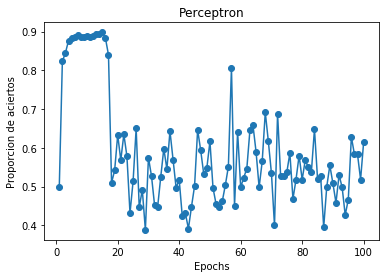

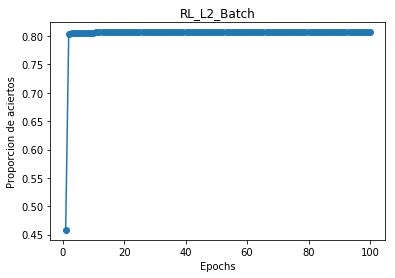

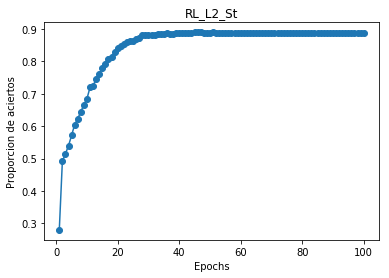

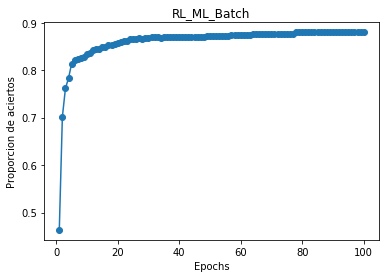

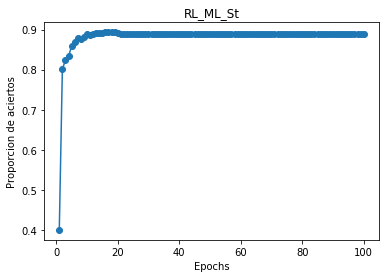

In [2]:
entrenar_y_dibujar_binarios(n_epochs=100, rate=0.001, rate_decay=True,
                            normalizacion=False,n_datos=600, dim_datos=4,
                            rango=3, separables=False)

## Aplicando clasificadores (III.2)
Aplicamos nuestros clasificadores a diferentes datasets

### Votos

In [3]:
from votos import *
for i, partido in enumerate(votos_entr_clas):
    if partido == 'democrata':
        votos_entr_clas[i] = 0
    else:
        votos_entr_clas[i] = 1
for i, partido in enumerate(votos_valid_clas):
    if partido == 'democrata':
        votos_valid_clas[i] = 0
    else:
        votos_valid_clas[i] = 1
for i, partido in enumerate(votos_test_clas):
    if partido == 'democrata':
        votos_test_clas[i] = 0
    else:
        votos_test_clas[i] = 1

votos_entr = np.array(votos_entr)
votos_entr_clas = np.array(votos_entr_clas)
votos_valid = np.array(votos_valid)
votos_valid_clas = np.array(votos_valid_clas)

print(entrenar_y_rendimiento_multis(100, 0.001, True, [0,1], votos_entr,
                                    votos_entr_clas, votos_valid,
                                    votos_valid_clas))

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


{'ovr_perceptron': 0.9420289855072463, 'ovr_rl_l2_batch': 0.9420289855072463, 'ovr_rl_l2_st': 0.9130434782608695, 'ovr_rl_ml_batch': 0.9710144927536232, 'ovr_rl_ml_st': 0.9420289855072463, 'rl_softmax': 0.9855072463768116}
('rl_softmax', 0.9855072463768116)


### MNIST (Dígitos)

In [4]:
def imagenes_a_array(ruta):
    archivo = open(ruta, 'r')
    lineas = archivo.readlines()
    n_imagenes = int(len(lineas)/28) + 1
    array = np.zeros((n_imagenes, 28, 28))
    n_imagen = 0
    for n_imagen in range(n_imagenes):
        for i in range(28):
            for j in range(28):
                if lineas[n_imagen+i][j] == "+" or  lineas[n_imagen+i][j] == "#":
                    array[n_imagen, i, j] = 1
    return array.reshape(n_imagenes, 784)

def labels_a_array(ruta):
    archivo = open(ruta, 'r')
    lineas = archivo.readlines()
    etiquetas = []
    for linea in lineas:
        etiquetas.append(int(linea))
    return np.array(etiquetas)

ruta_a_digidata = '/home/roberto/Documentos/us/practicas/aia/trabajo/digitdata/'

digidata_train = imagenes_a_array(ruta_a_digidata + 'trainingimages')
digidata_val = imagenes_a_array(ruta_a_digidata + 'validationimages')
digidata_test = imagenes_a_array(ruta_a_digidata + 'testimages')
digidata_train_clas = labels_a_array(ruta_a_digidata + 'traininglabels')
digidata_val_clas = labels_a_array(ruta_a_digidata + 'validationlabels')
digidata_test_clas = labels_a_array(ruta_a_digidata + 'testlabels')

Al intentar leerlo me he dado cuenta de que los datos no están en formato 28*28 de modo que no tengo demasiado claro como tratarlo a la hora de tratar los datos.
Pero si fuese correcto podría hacerse algo así

In [5]:
ovr_digidata = Clasificador_RL_OvR(Clasificador_RL_ML_St, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ovr_digidata.entrena(digidata_train, digidata_train_clas, 50, 0.05, True)
rendimiento(ovr_digidata, digidata_val, digidata_val_clas)

0.1088911088911089